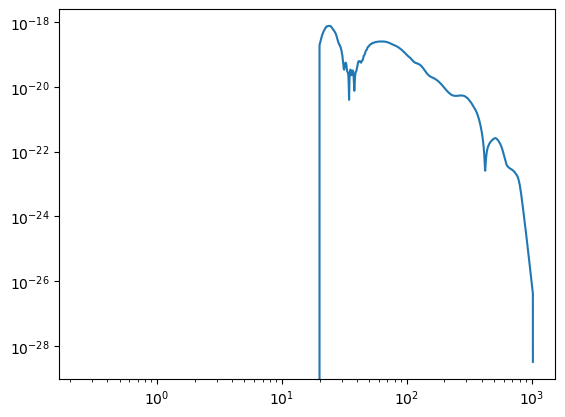

In [43]:
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal
import lalsimulation as lalsim
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for IMRPhenomXPHM in the frequency domain
mass1 = 30 * lal.MSUN_SI       # Mass of the primary component in kg
mass2 = 25 * lal.MSUN_SI       # Mass of the secondary component in kg
spin1z = 0.6                   # Dimensionless spin along z-axis for the primary
spin1x = 0.7
spin2z = 0.                   # Dimensionless spin along z-axis for the secondary
distance = 500 * lal.PC_SI     # Distance to the source in meters
inclination = 0.4              # Inclination angle in radians
phi_ref = 0.0                  # Reference phase at coalescence
f_ref = 20.0                   # Reference frequency in Hz
f_min = 20.0                   # Minimum frequency of the waveform in Hz
f_max = 1024.0                 # Maximum frequency of the waveform in Hz
delta_f = 1.0 / 4              # Frequency step in Hz

# https://lscsoft.docs.ligo.org/lalsuite/lalsimulation/group___l_a_l_sim_inspiral__c.html#ga3f2c0361db119a3c9217daec38578f76
# lalsim / inspiral simulation packages / header.h / module lalsiminspiral.c
hp, hc = lalsim.SimInspiralChooseFDWaveform(
    mass1, mass2,
    spin1x, 0, spin1z,
    0, 0, 0,
    distance, inclination,
    phi_ref, 0, 0, 0,
    delta_f, f_min, f_max, f_ref,
    None,  # Usually corresponds to an extra LAL parameter
    lalsim.IMRPhenomXPHM  # Specify the waveform approximant at the correct position
)
    

f0 = hp.f0           # Starting frequency
deltaF = hp.deltaF   # Frequency spacing
length = hp.data.length  # Number of data points


frequencies = f0 + np.arange(length) * deltaF
plt.loglog(frequencies, np.abs(hp.data.data-1j*hc.data.data))

In [44]:
# https://lscsoft.docs.ligo.org/lalsuite/lalsimulation/group___l_a_l_sim_inspiral__c.html#ga3f2c0361db119a3c9217daec38578f76
# lalsim / inspiral simulation packages / header.h / module lalsiminspiral.c

hlm = lalsim.SimInspiralChooseFDModes(
        mass1, mass2,
        spin1x, 0, spin1z,
        0, 0, 0,
        delta_f, f_min, f_max,
        f_ref, phi_ref,
        distance, inclination,
        None,  # Usually corresponds to an extra LAL parameter
        lalsim.IMRPhenomXPHM  # Specify the waveform approximant at the correct position
    )

f = np.array(hlm.fdata.data)

In [45]:
di = {}
mode_keys = []
current_entry = hlm.this
while current_entry is not None:
    key = current_entry
    l = key.l
    m = key.m
    di[(l,m)] = current_entry.this
    mode_keys.append((l, m))
    current_entry = current_entry.next

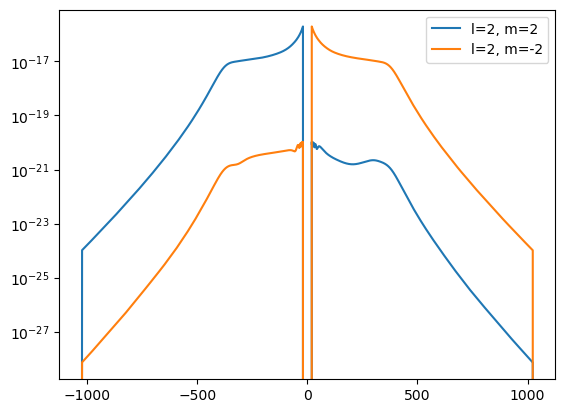

In [46]:
arr = [(2,2),(2,-2)]
for ii in arr:
    plt.semilogy(f, np.abs(di[ii].mode.data.data), label = f"l={ii[0]}, m={ii[1]}")
plt.legend(loc=1)
# plt.ylim(bottom=1e-20)

(1e-20, 1.0090612702462252e-15)

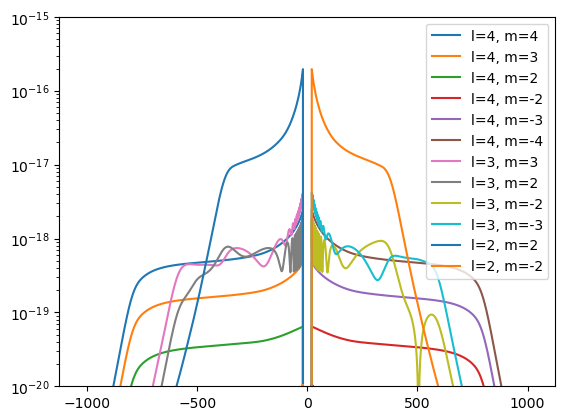

In [47]:
# arr = [(2,2),(2,-2), (2,0)]
arr = mode_keys
for ii in arr:
    if (ii[0] <=4) and (ii[0]>=2):
        if np.abs(ii[1]) >=2:
            plt.semilogy(f, np.abs(di[ii].mode.data.data), label = f"l={ii[0]}, m={ii[1]}")
plt.legend(loc=1)
plt.ylim(bottom=1e-20)
